In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
X = data.drop('Class',axis =1)
y = data['Class']

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y,random_state=42,test_size=0.2)

In [6]:
from sklearn.preprocessing import MinMaxScaler
lb = MinMaxScaler(feature_range=(0,1))
X_train = lb.fit_transform(X_train)
X_test = lb.transform(X_test)

In [7]:
X_train.shape,X_test.shape

((227845, 30), (56962, 30))

In [8]:
y_train = y_train.astype(bool)
y_test = y_test.astype(bool)

In [9]:
normal_train = X_train[y_train]
normal_test = X_test[y_test]

fraud_train = X_train[~y_train]
fraud_test = X_test[~y_test]

In [10]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

In [11]:
encoder = Sequential([
    Dense(30,activation='relu',input_shape=(30,)),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
    Dense(8,activation='relu'),
])

decoder = Sequential([
    Dense(8,activation='relu'),
    Dense(16,activation='relu'),
    Dense(32,activation='relu'),
    Dense(64,activation='relu'),
    Dense(30,activation='relu'),
])(encoder.output)


In [12]:
model = Model(inputs=encoder.input, outputs=decoder)

model.compile(loss='msle',metrics=['mse'],optimizer='adam')

In [13]:
epochs = 20
H =model.fit(normal_train,normal_train,validation_data=(X_test,X_test),epochs=epochs)

Epoch 1/20
13/13 [==============================] - 17s 1s/step - loss: 0.1316 - mse: 0.2299 - val_loss: 0.0902 - val_mse: 0.1653
Epoch 2/20
13/13 [==============================] - 11s 950ms/step - loss: 0.0736 - mse: 0.1318 - val_loss: 0.0727 - val_mse: 0.1276
Epoch 3/20
13/13 [==============================] - 11s 888ms/step - loss: 0.0667 - mse: 0.1145 - val_loss: 0.0716 - val_mse: 0.1243
Epoch 4/20
13/13 [==============================] - 10s 821ms/step - loss: 0.0656 - mse: 0.1114 - val_loss: 0.0701 - val_mse: 0.1207
Epoch 5/20
13/13 [==============================] - 10s 839ms/step - loss: 0.0652 - mse: 0.1107 - val_loss: 0.0703 - val_mse: 0.1213
Epoch 6/20
13/13 [==============================] - 10s 862ms/step - loss: 0.0651 - mse: 0.1105 - val_loss: 0.0703 - val_mse: 0.1213
Epoch 7/20
13/13 [==============================] - 9s 775ms/step - loss: 0.0651 - mse: 0.1104 - val_loss: 0.0700 - val_mse: 0.1207
Epoch 8/20
13/13 [==============================] - 6s 538ms/step - loss:

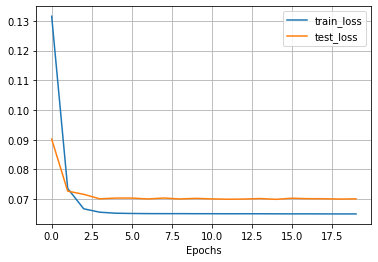

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['loss'],label = 'train_loss')
plt.plot(range(0,epochs),H.history['val_loss'],label = 'test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

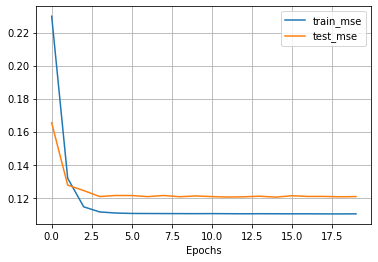

In [15]:
plt.plot(range(0,epochs),H.history['mse'],label = 'train_mse')
plt.plot(range(0,epochs),H.history['val_mse'],label = 'test_mse')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend()
plt.grid()

In [16]:
import numpy as np
from tensorflow.keras.losses import mse

prediction = model(X_test)
error = mse(prediction,X_test)
error = np.asarray(error)
threshold = np.percentile(error, 95)
print('threshold',threshold)

threshold 0.12835160010011326


In [17]:
df = pd.DataFrame()
df['error'] = error
df['threshold'] =threshold

x_range = range(0,df.shape[0])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x_range,df['threshold'],color='orange',linewidth=2,label ='threshold')
plt.scatter(x_range,df['error'],marker='.',label='error')
plt.legend();